In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
!pip -q install autokeras

import autokeras as ak

In [3]:
data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["MEDV"] = data.target
df.to_csv("boston.csv", index=False)
df.head(7)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9


# Podział na zmienną niezależną i zależną, zbiór treningowy i testowy oraz normalizacja


In [4]:
X = df.iloc[ : , :-1]
y = df.iloc[ :, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# normalizacja X_train i X_test
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

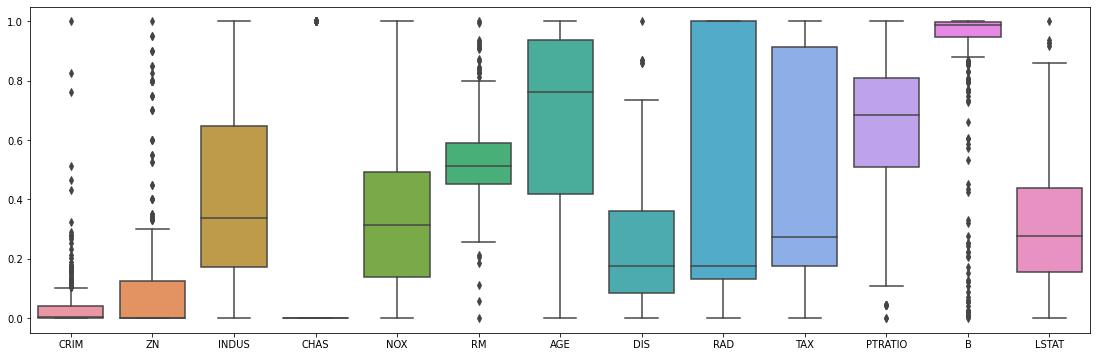

In [5]:
plt.figure(figsize=(19,6))
df_tmp = pd.DataFrame(X_train, columns=data.feature_names)
sns.boxplot( data=df_tmp )
plt.show()

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model

# Utworzenie sieci w modelu sekwencyjnym

In [7]:
model = Sequential()

model.add( Dense(128, input_shape=(13,), activation="relu" ) )
model.add( Dense(64, activation="relu") )
model.add( Dense(1, activation="relu") )

model.compile(optimizer="adam", loss="mse", metrics=["mae"])

result = model.fit(X_train, y_train, epochs=100, validation_split=0.05, verbose=0)

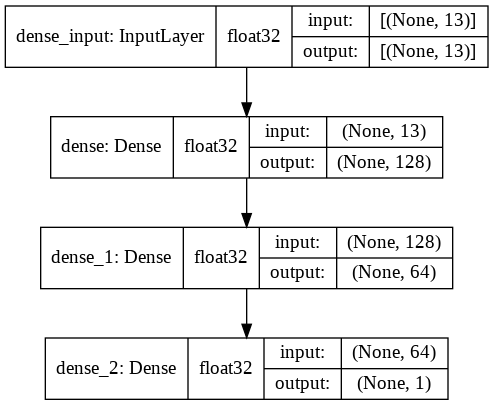

In [9]:
tf.keras.utils.plot_model( model, show_dtype=True, show_shapes=True )

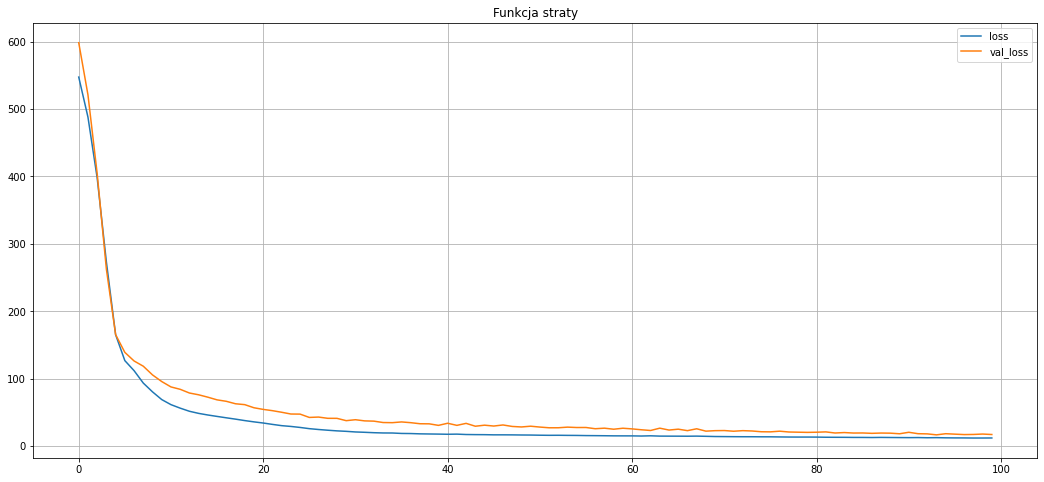

In [17]:
df_tmp = pd.DataFrame( result.history )
df_tmp
df_tmp[ ["loss","val_loss"] ].plot(figsize=(18,8), grid=True, title="Funkcja straty")
plt.savefig("lr.png", dpi=96)

# Ewaluacja modelu i obliczenia współczynnika dopasowania

In [11]:
mse_, mae_ = model.evaluate(X_test, y_test, verbose=0)
#print(mse_, mae_)

y_pred = model.predict(X_test)
print("Współczynnik dopasowania:", r2_score(y_test, y_pred))

Współczynnik dopasowania: 0.7028555795977407


# Regresja liniowa

In [12]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

mse_ = mean_squared_error(y_test, y_pred)
mae_ = mean_absolute_error(y_test, y_pred)

#print(mse_, mae_)

print("Współczynnik dopasowania:", r2_score(y_test, y_pred))

Współczynnik dopasowania: 0.6592466510354094


# Znalezienie modelu przy użyciu AutoKeras

In [ ]:
model = ak.StructuredDataRegressor(
    overwrite=True, max_trials=5
) 
model.fit(X_train, y_train, epochs=100, verbose=0, validation_split=0.05)

In [14]:
y_pred = model.predict(X_test)
print("Współczynnik dopasowania:", r2_score(y_test, y_pred))

4/4 [==============================] - 0s 4ms/step
Współczynnik dopasowania: 0.7337990496382614


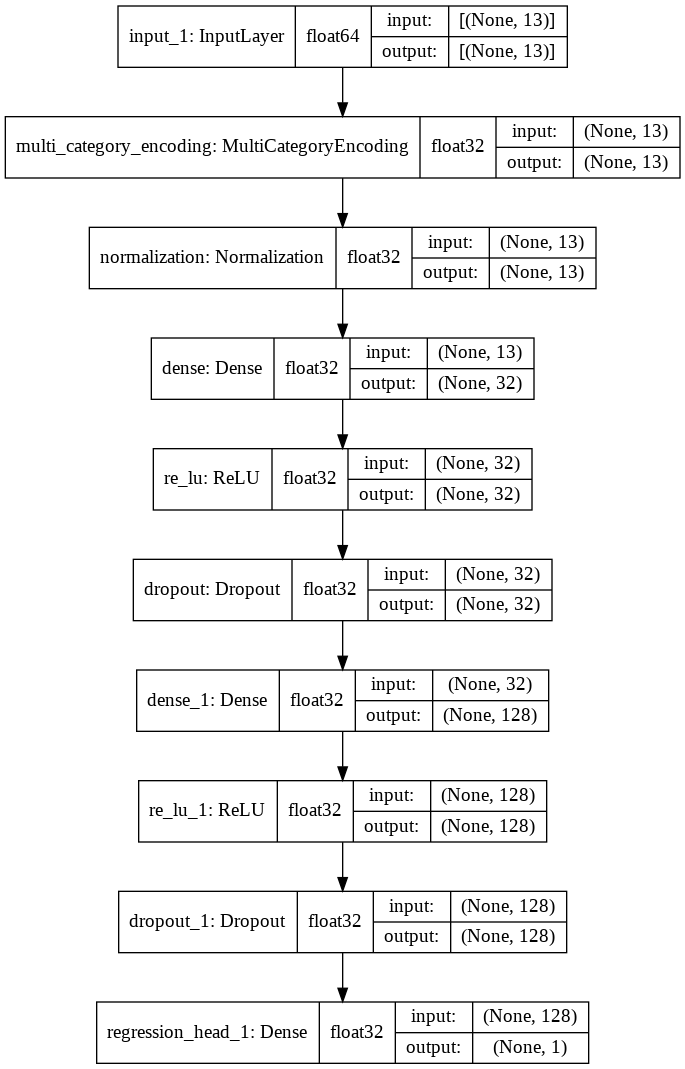

In [15]:
tf.keras.utils.plot_model( model.export_model(), show_dtype=True, show_shapes=True )